In [39]:
import cv2
import random
import glob
import numpy as np
import matplotlib.pyplot as plt
import random
import time 
import numpy as np
# import skimage
import os 

from PIL import Image,ImageDraw,ImageFont,ImageEnhance,ImageFilter
%matplotlib inline

origin_images = glob.glob('./blank_region/*.jpg')
font = ImageFont.truetype('./font/Songti.ttc',20,index=6)
# font = ['./font/华文细黑.ttf','./font/Songti.ttc','./font/STHeitiLight.ttc']
save_dir = '/mnt/wuwenhui/git_ocr_project/chinese_ocr_densenet/train/images/num_dot_v1/valid/'
if not os.path.exists(save_dir):
    os.mkdir(save_dir)
font_dir = ['./font/STHeitiLight.ttc','./font/Songti.ttc','./font/Hiragino Sans GB.ttc']


In [15]:
font_dir = ['./font/Songti.ttc','./font/华文细黑.ttf']
# font_dir = ['./font/华文细黑.ttf']

def SaltAndPepper(src,percetage):  
    SP_NoiseImg=src 
    SP_NoiseNum=int(percetage*src.shape[0]*src.shape[1]) 
    for i in range(SP_NoiseNum): 
        randX=np.random.randint(0,src.shape[0]-1) 
        randY=np.random.randint(0,src.shape[1]-1) 
        if np.random.randint(0,1)==0: 
            SP_NoiseImg[randX,randY]=0 
        else: 
            SP_NoiseImg[randX,randY]=255 
    return SP_NoiseImg

def image_enhance(img):
    
    flag1 = random.random()
    if flag1 > 0.3:
        img = ImageEnhance.Contrast(img).enhance(random.random()/2+0.8)
        img = ImageEnhance.Brightness(img).enhance(random.random()/1.5+0.75)
        flag2 = random.random()
        if flag2 > 0.5:
            for _ in range(random.randint(0,4)):
                img = ImageEnhance.Sharpness(img).enhance(0.01)
#                 print('sharp one')
        elif flag2 > 0.3:
            for _ in range(random.randint(0,3)):
                img = img.filter(ImageFilter.SMOOTH_MORE)
#                 print('smooth one')
    return img



def gen_text_randomSize(name_item):
    name,item = name_item
    fontName= random.choice(font_dir)
    fontSize= random.randint(18,21)
    len_item = len(item.strip())
    origin_images = glob.glob('./blank_region/*.jpg')
    if fontName == './font/Songti.ttc':
        index = 6
    else:
        index = 0
#     print(fontName,fontSize)
    font = ImageFont.truetype(font=fontName,size=fontSize,index=index)
    img = cv2.imread(random.choice(origin_images))
    image = img.copy()
    h,w = img.shape[:2]
    blank = random.choice([2,2,2,2,2,25,50])
    text_h,text_w = 32,160
#     if random.random() > 0.7:
#         text_h,text_w = random.randint(fontSize+3,fontSize+7),(fontSize-5)*len_item+1+blank
    h_chop = h-text_h
    w_chop = w-text_w
#     print(h,w,text_h,text_w,blank)
    x = np.random.randint(w_chop)
    y = np.random.randint(h_chop)
    image = image[y:y+text_h,x:x+text_w]

    flag = random.random()
#     if flag >0.7:
# #         image = skimage.util.random_noise(image,mode='gaussian',var=0.002)
#         image = np.uint8(image*255)
    

#     print(image.shape)
    img_PIL = Image.fromarray(image[:,:,::-1])
    draw = ImageDraw.Draw(img_PIL)
    ### 如果字符的长度比较短，尝试使用多个
    if ' ' in item:
        item1,item2 = item.split(' ')
        draw.text((blank,3),item1,font=font,fill=(0,0,0))
        if blank<=25:
            draw.text((blank+text_w/2-blank,3),item2,font=font,fill=(0,0,0))
    else:
        draw.text((blank,3),item,font=font,fill=(0,0,0))
    img_PIL = image_enhance(img_PIL)
    
#     with open(save_dir+item.replace('/','&&')+ "-" + str(fontSize) +'.txt', "w", encoding='utf-8') as f:
#         f.write(item)
    img_PIL.save(save_dir+name +'.png') 
    return img_PIL

In [16]:
num_dict = '0123456789,.'
char_dict = 'ABCDEFGHIJKLMNPQRSTUVWXYZabcdefghijklmnpqrstuvwxyz'

def gen_number_with_dot():
    serial_len = random.randint(0,5)
    num = random.random() * 10**serial_len if random.random() > 0.5 else random.randint(1,10**serial_len)
    num =  num if random.random() > 0.5 else round(random.random(),random.randint(1,2)) 
    reserve_list = [ '{:,.1f}', '{:,.2f}', '{:,.3f}']
    serial = random.choice(reserve_list).format(num)
    return serial

def gen_number_only():
    serial_len = random.randint(0,7)
    num = random.randint(1,10**serial_len)
    return '{:,}'.format(num)

def gen_serial_num():
    serial_len = 10
    serial_begin = random.sample(char_dict[:]+num_dict[:10],1)
    serial = random.sample(char_dict[:]+num_dict[:],serial_len-1)
    return ''.join(serial_begin+serial)

def gen_money_with_dollar_sign():
    serial = gen_number_with_dot()
    serial_begin = '￥'
    return serial_begin+serial 

def gen_number_with_percent_sign():
    num = random.random() if random.random() > 0.5 else round(random.random(),2)
    reserve_list = ['{:.1%}','{:.2%}','{:.3%}']
    serial = random.choice(reserve_list).format(num)
    return serial


def gen_money_with_Chinese():
    serial = gen_number_with_dot()
    Chinese_list = ["合计:" + serial, serial+"元",'总额'+serial, '单价'+serial,"合计" + serial]
    return random.choice(Chinese_list)

def up_to_10(text):
    length = len(text)
    if length < 10:
        char_text = ''.join(random.sample(num_dict,10-length))
        text = char_text+text
    return text
def double_5(text):
    length = len(text)
    text = text if length > 5 else text+' '+text
    return text

In [17]:
list_len = 50000
serial_num = [gen_serial_num() for _ in range(list_len)]
number_only = [gen_number_only() for _ in range(list_len)]
number_with_dot = [gen_number_with_dot() for _ in range(list_len)]
# money_with_dollar_sign = [gen_money_with_dollar_sign()  for _ in range(list_len)]
# money_with_percent_sign = [gen_number_with_percent_sign()  for _ in range(list_len)]
# random_char = [''.join(random.sample(num_dict,10)) for _ in range(list_len)]
# money_with_Chinese = [gen_money_with_Chinese() for _ in range(list_len)]
total_num = number_with_dot + number_only 
#             money_with_dollar_sign + money_with_percent_sign 

total_num = [num[:10] for num in total_num]
total_num_10 = [double_5(text) for text in total_num ]
random.shuffle(total_num_10)
len(total_num_10)

100000

In [18]:
# print(number_with_dot[:10])
# print(random_char[:10])
# print(number_only[:10])
# print(number_with_dot[:10])
# print(money_with_dollar_sign[:10])
# print(money_with_percent_sign[:10])
# print(money_with_Chinese[:10])
# print(serial_num[:10])
print(total_num_10[40:80])

['0.500 0.500', '0.720 0.720', '49,386', '31 31', '2,124.4', '2.835 2.835', '31.749', '420,307', '0.5 0.5', '1,533,648', '54,332', '48,312', '0.1 0.1', '6 6', '6,422,377', '4.000 4.000', '7 7', '0.4 0.4', '851,766', '0.50 0.50', '57 57', '4,850.4', '0.320 0.320', '3,224,479', '1 1', '0.0 0.0', '7 7', '594.0 594.0', '0.980 0.980', '6,310 6,310', '3,538,688', '757,111', '72 72', '8,015,435', '69 69', '64,932', '251.000', '0.910 0.910', '1,072.19', '0.9 0.9']


'10,144'

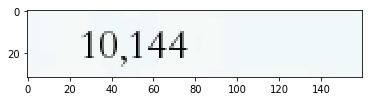

In [19]:

# random_char = [''.join(random.sample(num_dict,10)) for _ in range(list_len)]
item = random.choice(total_num_10)
result = gen_text_randomSize(('name',item))
plt.imshow(result)
item.replace(' ','')

In [10]:
##### from multiprocessing import Pool,cpu_count


In [35]:
from multiprocessing import Pool,cpu_count

items = [('num_dot_%d.png'%i,item) for i,item in enumerate(total_num_10)]
print(len(items))
pool = Pool(cpu_count()//2)
start = time.time()
# %time result = pool.map(gen_text_randomSize,items)
end = time.time()
print(end-start,cpu_count()//2)
print(items[:10])

100000
7.128715515136719e-05 16
[('num_dot_0.png', '0.70 0.70'), ('num_dot_1.png', '8 8'), ('num_dot_2.png', '1,483 1,483'), ('num_dot_3.png', '70,326'), ('num_dot_4.png', '33,500.89'), ('num_dot_5.png', '11,045'), ('num_dot_6.png', '0.660 0.660'), ('num_dot_7.png', '39,720'), ('num_dot_8.png', '0.2 0.2'), ('num_dot_9.png', '373,750')]


In [37]:
import json

dict_num = {name:item.replace(' ','') for name,item in items}


# save_dir ='/mnt/wuwenhui/git_ocr_project/chinese_ocr_densenet/train/images/num_dataset_v2/'

#保存成.json
with open(save_dir+"train_label.json",'w',encoding='utf-8') as json_file:   
        json.dump(dict_num,json_file)
        
# load json 文件
with open(save_dir+"train_label.json",'r',encoding='utf-8') as json_file:
    txt=json.load(json_file)

In [22]:
# number_with_dot = [gen_number_with_dot() for _ in range(30000)]
# len(set(number_with_dot))

In [38]:
len(txt),len(dict_num)

txt['num_dot_10941.png']

'0.200.20'

In [ ]:
dst_path = '/mnt/wuwenhui/git_ocr_project/chinese_ocr_densenet/train/images/medicine_dataset_v3/'

ori_path = '/mnt/wuwenhui/git_ocr_project/chinese_ocr_densenet/train/images/num_dataset_v2/'

# with open(dst_path+"train_label.json",'w',encoding='utf-8') as json_file:   
#         json.dump(dict_num,json_file)
        
# load json 文件
with open(dst_path+"valid_label.json",'r',encoding='utf-8') as json_file:
    dst_valid_txt=json.load(json_file)

    
with open(ori_path+"valid_label.json",'r',encoding='utf-8') as json_file:
    ori_valid_txt=json.load(json_file)

with open(dst_path+"train_label.json",'r',encoding='utf-8') as json_file:
    dst_train_txt=json.load(json_file)

    
with open(ori_path+"train_label.json",'r',encoding='utf-8') as json_file:
    ori_train_txt=json.load(json_file)
    

In [ ]:
len(dst_valid_txt),len(ori_valid_txt)

In [ ]:
total_train = {}
total_train.update(dst_valid_txt)
total_train.update(ori_valid_txt)
len(total_train),len(dst_valid_txt)


In [ ]:
with open(dst_path+"valid_label_total.json",'w',encoding='utf-8') as json_file:   
        json.dump(total_train,json_file)

In [ ]:
len(set(total_train.keys()) & set(imgs_png))

In [ ]:
import glob
imgs = glob.glob(dst_path+'valid/*png')
imgs2 = glob.glob(dst_path+'valid/.*.png')
file = glob.glob(ori_path+'train/*')
file2 = glob.glob(ori_path+'train/.*')

print(len(imgs+imgs2),len(file+file2))

imgs_png = set([os.path.split(img)[-1] for img in imgs+imgs2])


In [ ]:
remove_list = set(total_train.keys()) - set(imgs_png)

In [ ]:
num_dict = dict([(key,value) for key,value in total_train.items() if key not in remove_list])

In [ ]:
num_dict


with open(dst_path+"valid_label.json",'w',encoding='utf-8') as json_file:   
        json.dump(num_dict,json_file)

In [ ]:
len(num_dict)

In [ ]:
save_dirsss = '/mnt/wuwenhui/git_ocr_project/chinese_ocr_densenet/train/images/dataset_len20_v1/valid/'
imgs = glob.glob(save_dirsss+'*jpg')
len(imgs)

In [ ]:
np.sort()

In [ ]:
u'\x7f'.replace('\x7f','A')